In [1]:
%matplotlib inline
from dfply import *
import pandas as pd 
import numpy as np
import pandas_profiling
import seaborn as sns
from plotnine import *
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
houses_areas = pd.read_csv("../clean_data/houses_areas.csv")
houses_areas.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000
mean,-119.595709,35.664826,29.327877,2273.974107,465.645229,1239.858797,434.800379,3.734309,201764.235514
std,2.004454,2.150482,12.374263,1248.423252,243.887168,662.433142,224.425055,1.612498,111154.986823
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,19.000000,1415.000000,291.000000,771.000000,276.000000,2.539800,116900.000000
50%,-118.540000,34.280000,30.000000,2044.000000,420.000000,1127.000000,396.000000,3.500000,176600.000000
75%,-118.020000,37.730000,38.000000,2909.000000,601.000000,1601.000000,562.000000,4.664100,258800.000000
max,-114.310000,41.950000,52.000000,8874.000000,1444.000000,3590.000000,1159.000000,9.606200,500001.000000


Now we will scale the features than we can scale with the purpose to make easier the process of the model 

In [3]:
houses_scale = houses_areas
houses_scale["housing_median_age"] = preprocessing.scale(houses_scale["housing_median_age"])
houses_scale["total_rooms"] = preprocessing.scale(houses_scale["total_rooms"])
houses_scale["total_bedrooms"] = preprocessing.scale(houses_scale["total_bedrooms"])
houses_scale["population"] = preprocessing.scale(houses_scale["population"])
houses_scale["households"] = preprocessing.scale(houses_scale["households"])
houses_scale["median_income"] = preprocessing.scale(houses_scale["median_income"])
houses_scale["median_house_value"] = preprocessing.scale(houses_scale["median_house_value"])

Let's check the stadistics and relations between the variables. 

In [4]:
pandas_profiling.ProfileReport(houses_scale)

The values that look more correlative with median_house_value are median_income (high positive correlative), total_rooms, median_age and household. It is also a correlation with proximity to the ocean, but here we can too see it because the proximity to the ocean is a categorical variable and we will not change it. So now let's build a model with median_income.

In [5]:
houses_areas_model = ols("median_house_value ~ median_income", data = houses_scale).fit()
print(houses_areas_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.505e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:11:48   Log-Likelihood:                -21419.
No. Observations:               19001   AIC:                         4.284e+04
Df Residuals:                   18999   BIC:                         4.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.551e-17      0.005   1.02e-14

The Adj. R-squared with only median income is 0.442 and the AIC 4.284e+04 and BIC 4.286e+04. Let's check the residuals behavior 

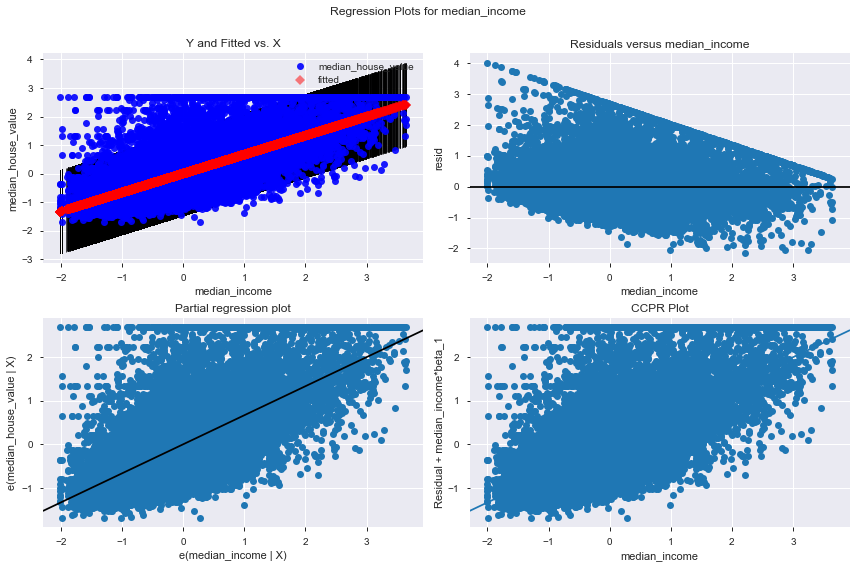

In [6]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(houses_areas_model, "median_income", fig=fig)

The residuals don't look very spread and with normal behaviour, probly this isn't the best fit, now let's check the behavior with ocean_proximity

In [7]:
houses_areas_model_a = ols("median_house_value ~ median_income + ocean_proximity", data = houses_scale).fit()
print(houses_areas_model_a.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     4856.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:11:50   Log-Likelihood:                -19138.
No. Observations:               19001   AIC:                         3.829e+04
Df Residuals:                   18995   BIC:                         3.834e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The Adj. R-Squared is 0.12 better with the adition of ocean_proximity and the AIC and BIC are getting better (lower).

In [12]:
houses_areas_model_b = ols("median_house_value ~ median_income + ocean_proximity + housing_median_age", data = houses_scale).fit()
print(houses_areas_model_b.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     4275.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:22:26   Log-Likelihood:                -18842.
No. Observations:               19001   AIC:                         3.770e+04
Df Residuals:                   18994   BIC:                         3.775e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The housing_median_age only add 0.02 to the Adj R-squared but the AIC and BIC still going down 

In [18]:
houses_areas_model_c = ols("median_house_value ~ median_income + ocean_proximity + housing_median_age + total_rooms", data = houses_scale).fit()
print(houses_areas_model_c.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     3718.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:30:01   Log-Likelihood:                -18762.
No. Observations:               19001   AIC:                         3.754e+04
Df Residuals:                   18993   BIC:                         3.760e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The Adj R-squared only going up 0.002 and the AIC and BIC still going down. Now let's check the model with all the variables.

In [19]:
houses_areas_model_t = ols("median_house_value ~ median_income + ocean_proximity + housing_median_age + total_rooms + total_bedrooms + population + households + latitude + longitude", data = houses_scale).fit()
print(houses_areas_model_t.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2938.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:34:22   Log-Likelihood:                -16989.
No. Observations:               19001   AIC:                         3.400e+04
Df Residuals:                   18988   BIC:                         3.411e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The Adj R squared with all the variables is 0.65 the AIC and BIC are going down. The std err is acceptable most of the time execpt bt proximity to Island. This model will not overfitting, probably we should use other type of modeling for doing this. 